In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
import re
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# matplotlibの文字化け対応
try:
    import japanize_matplotlib
except ImportError:
    raise

matplotlib.style.use('ggplot')

# seabornの文字化け対応
sns.set(font='IPAexGothic')
# sns.palplot(sns.hls_palette(24))


# See https://note.nkmk.me/python-pandas-option-display/
# pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 150)
pd.set_option('display.unicode.east_asian_width', True)

df = pd.read_csv("/Users/akiyoko/Downloads/Django パッケージ利用実態調査アンケート（2022年版）（回答） - フォームの回答 1.csv")
df

タイムスタンプ Q1．Django の経験はどのくらいですか？  \
0   2022/12/01 10:09:09                               5年以上   
1   2022/12/01 10:20:20                          3〜5年くらい   
2   2022/12/01 10:27:33                               5年以上   
3   2022/12/01 10:45:50                               5年以上   
4   2022/12/01 11:28:40                          1〜3年くらい   
5   2022/12/01 12:29:00                          1〜3年くらい   
6   2022/12/01 14:01:33                               5年以上   
7   2022/12/01 15:14:29                          3〜5年くらい   
8   2022/12/01 19:41:51                               5年以上   
9   2022/12/01 20:48:14                          3〜5年くらい   
10  2022/12/01 21:46:52                          1〜3年くらい   
11  2022/12/01 23:55:06                               5年以上   
12   2022/12/02 8:01:59                          3〜5年くらい   
13  2022/12/02 12:12:05                               5年以上   
14  2022/12/02 12:15:21                              経験なし   
15  2022/12/02 13:46:55                               1年未満   
16  2022/12/02 16:19:31                          1〜3年くらい   
17  2022/12/02 20:02:15                          1〜3年くらい   
18  2022/12/02 20:49:01                               5年以上   
19  2022/12/02 22:00:19                          1〜3年くらい   
20   2022/12/03 0:28:59                          3〜5年くらい   
21  2022/12/03 13:52:01                               5年以上   
22  2022/12/03 18:58:42                          3〜5年くらい   
23  2022/12/03 19:37:13                          1〜3年くらい   
24  2022/12/03 21:37:56                          1〜3年くらい   
25  2022/12/04 14:28:42                          1〜3年くらい   
26  2022/12/04 23:27:09                          1〜3年くらい   
27  2022/12/04 23:28:18                          1〜3年くらい   
28  2022/12/05 12:55:30                          3〜5年くらい   
29  2022/12/06 18:41:15                          3〜5年くらい   
30   2022/12/07 6:06:19                          1〜3年くらい   
31  2022/12/08 12:51:15                          1〜3年くらい   
32  2022/12/08 13:05:46                               1年未満   
33  2022/12/08 19:35:36                          1〜3年くらい   
34  2022/12/08 21:38:37                          3〜5年くらい   
35  2022/12/11 23:16:09                          3〜5年くらい   
36   2022/12/14 9:23:46                          1〜3年くらい   
37  2022/12/14 12:09:01                          1〜3年くらい   
38  2022/12/14 12:17:25                               5年以上   
39   2022/12/15 9:26:10                          1〜3年くらい   

   Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-database-url (https://pypi.org/project/dj-database-url/)]  \
0                                 3: 使ったことがある                                                                                                                                                                                                                       
1                                 1: 聞いたことがない                                                                                                                                                                                                                       
2               2: 聞いたことはあるが使ったことはない                                                                                                                                                                                                                       
3                                 4: 現場で使っている                                                                                                                                                                                                                       
4                                 1: 聞いたことがない                                                                                                                                                                                                                       
5                                 1: 聞いたことがない             

In [2]:
df.describe()

タイムスタンプ Q1．Django の経験はどのくらいですか？  \
count                    40                                    40   
unique                   40                                     5   
top     2022/12/01 10:09:09                          1〜3年くらい   
freq                      1                                    17   

       Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-database-url (https://pypi.org/project/dj-database-url/)]  \
count                                                  40                                                                                                                                                                                                                       
unique                                                  4                                                                                                                                                                                                                       
top                                   1: 聞いたことがない                                                                                                                                                                                                                       
freq                                                   26                                                                                                                                                                                                                       

       Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-rest-knox (https://pypi.org/project/django-rest-knox/)]  \
count                                                  40                                                                                                                                                                                                                     
unique                                                  2                                                                                                                                                                                                                     
top                                   1: 聞いたことがない                                                                                                                                                                                                                     
freq                                                   37                                                                                                                                                                                                                     

       Q2．次の Django パッケージをそれぞれどのくらい利用していますか？\n\n1: 聞いたことがない\n2: 聞いたことはあるが実際に使ったことはない\n3: 試しに使ったことがある\n4: 現場で使っている（過去に使っていた） [dj-rest-auth (https://pypi.org/project/dj-rest-auth/)]  \
count                                                  40                                                                                                                                                                                                                 
unique                                                  4                                                                                                                                                                                                                 
top                                   1: 聞いたことがない                                                                                                                                                                                                                 
freq                                                   23                                                                                                                          

## 経験年数

In [3]:
Q1_CHOICES = ['経験なし', '1年未満', '1〜3年くらい', '3〜5年くらい', '5年以上']

# 経験年数でグルーピング
df_grouped = df.groupby('Q1．Django の経験はどのくらいですか？')

# インデックスが経験年数の選択肢、列名が選択肢ごとの合計人数となるDataFrameを作成
df_experience = pd.DataFrame()
df_experience['人数'] = df_grouped.size()
# 選択肢の順番通りにindexをソート
# https://www.yutaka-note.com/entry/pandas_sort
df_experience = df_experience.sort_index(key=lambda s: s.map(Q1_CHOICES.index))

df_experience

人数
Q1．Django の経験はどのくらいですか？      
経験なし                                  1
1年未満                                   2
1〜3年くらい                             17
3〜5年くらい                             10
5年以上                                  10

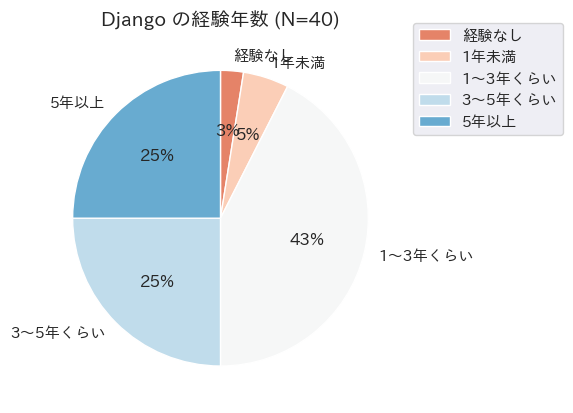

In [4]:
# 円グラフを描画

# https://jinpei0908.hatenablog.com/entry/2016/11/01/030653
def generate_cmap(color_list=None):
    n = len(color_list) - 1
    return LinearSegmentedColormap.from_list(name='custom', colors=[(i / n, j) for i, j in enumerate(color_list)])


# グラフで使用する色
n_cols = df_experience.shape[0]
# https://qiita.com/kenmatsu4/items/fe8a2f1c34c8d5676df8
# colors = generate_cmap(['mediumblue', 'limegreen', 'orangered'])(np.linspace(0, 1, n_cols))
colors = plt.get_cmap('RdBu')(np.linspace(0.25, 0.75, n_cols))

fig, ax = plt.subplots()

# 円グラフ
ax.pie(df_experience['人数'].values,
       labels=df_experience.index,
       colors=colors,
       autopct='%.0f%%',
       # 円グラフを開始する角度
       startangle=90,
       # 反時計回りにするかどうか
       counterclock=False)
# タイトル
n = df_experience['人数'].sum()
ax.set_title(f'Django の経験年数 (N={n})', size=14)
# 凡例を表示
ax.legend(bbox_to_anchor=(1, 1.05))

In [5]:
# 経験年数の回答文字列から先頭1文字の数値文字列を取り出してint型に変換する関数
def experience_to_int(x: str):
    if x == '経験なし':
        return 0
    elif x == '1年未満':
        return 0.5
    elif x == '1〜3年くらい':
        return 2
    elif x == '3〜5年くらい':
        return 4
    elif x == '5年以上':
        return 7.5


# Django経験年数の質問のみに列を限定して、回答文字列をintに変換
df.iloc[:, 1:2].applymap(experience_to_int).mean()

Q1．Django の経験はどのくらいですか？    3.75
dtype: float64

## Djangoパッケージの利用実態

In [6]:
# パッケージ利用実態の回答文字列からDjangoパッケージ名を取り出す関数
def usage_to_package_name(column_name):
    column_name = re.sub('\n', '', column_name)
    package_name = re.match(r'.+\[([^ ]+).+', column_name).group(1)
    return package_name


# Djangoパッケージの質問のみに列を限定して、列名を置換
df_packages = df.iloc[:, 2:].rename(columns=usage_to_package_name)
df_packages

dj-database-url                           dj-rest-knox                           dj-rest-auth  \
0                     3: 使ったことがある  2: 聞いたことはあるが使ったことはない                    3: 使ったことがある   
1                     1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
2   2: 聞いたことはあるが使ったことはない  2: 聞いたことはあるが使ったことはない  2: 聞いたことはあるが使ったことはない   
3                     4: 現場で使っている                    1: 聞いたことがない                    4: 現場で使っている   
4                     1: 聞いたことがない                    1: 聞いたことがない                    3: 使ったことがある   
5                     1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
6                     3: 使ったことがある                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
7                     4: 現場で使っている                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
8                     1: 聞いたことがない                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
9                     4: 現場で使っている                    1: 聞いたことがない                    1: 聞いたことがない   
10                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
11                    4: 現場で使っている                    1: 聞いたことがない                    4: 現場で使っている   
12                    1: 聞いたことがない                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
13  2: 聞いたことはあるが使ったことはない                    1: 聞いたことがない                    1: 聞いたことがない   
14                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
15                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
16                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
17                    1: 聞いたことがない                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
18                    3: 使ったことがある                    1: 聞いたことがない                    1: 聞いたことがない   
19                    1: 聞いたことがない                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
20  2: 聞いたことはあるが使ったことはない                    1: 聞いたことがない                    1: 聞いたことがない   
21                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
22  2: 聞いたことはあるが使ったことはない                    1: 聞いたことがない                    1: 聞いたことがない   
23                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
24                    1: 聞いたことがない                    1: 聞いたことがない                    4: 現場で使っている   
25                    1: 聞いたことがない                    1: 聞いたことがない                    3: 使ったことがある   
26                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
27                    3: 使ったことがある                    1: 聞いたことがない                    1: 聞いたことがない   
28                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
29                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
30                    4: 現場で使っている                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
31                    1: 聞いたことがない                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
32                    1: 聞いたことがない                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
33                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
34                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
35                    3: 使ったことがある                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない   
36                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
37                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   
38                    1: 聞いたことがない  2: 聞いたことはあるが使ったことはない                    1: 聞いたことがない   
39                    1: 聞いたことがない                    1: 聞いたことがない                    1: 聞いたことがない   

                           django-allauth                          django-braces                        

In [7]:
CHOICES = ['1: 聞いたことがない', '2: 聞いたことはあるが使ったことはない', '3: 使ったことがある', '4: 現場で使っている']
reversed_choices = list(reversed(CHOICES))

# sr_counts = []
# package_names = []
# for package_name, sr in df_packages.items():
#     # 出現回数をカウント
#     sr_count = sr.value_counts()
#     # print(f'{sr_count=}')
#     sr_counts.append(sr_count)
#     package_names.append(package_name)
#
# # indexがパッケージ名、columnsが回答（1.〜4.の選択肢）となるDataFrameを作成
# df_count = pd.DataFrame(
#     sr_counts,
#     index=package_names,
#     columns=CHOICES,
# )
# 列ごとに出現回数をカウント
df_count = df_packages.apply(pd.Series.value_counts)
# 転置して、indexがパッケージ名、columnsが回答（1.〜4.の選択肢）となるDataFrameに変換する
df_count = df_count.T

# NaNを0に変換
df_count = df_count.fillna(0)

# # 列を 4 → 1 の順に並べ替え
df_count = df_count.reindex(columns=reversed_choices)

# 利用度や認知度が高い順にソート
df_count = df_count.sort_values(reversed_choices, ascending=False)
# df_count = df_count.sort_values(['4: 現場で使っている', '3: 使ったことがある', '2: 聞いたことはあるが使ったことはない', '1: 聞いたことがない'], ascending=False)
df_count

4: 現場で使っている  3: 使ったことがある  2: 聞いたことはあるが使ったことはない  1: 聞いたことがない
djangorestframework                           27.0                 11.0                                    2.0                  0.0
django-debug-toolbar                          22.0                  9.0                                    3.0                  6.0
django-storages                               15.0                  5.0                                    5.0                 15.0
django-cors-headers                           14.0                  8.0                                    6.0                 12.0
django-filter                                 14.0                  7.0                                    5.0                 14.0
django-extensions                             13.0                  8.0                                    5.0                 14.0
django-environ                                12.0                 11.0                                    7.0                 10.0
pytest-django                                 12.0                  6.0                                    9.0                 13.0
django-redis                                  10.0                  3.0                                   11.0                 16.0
django-celery                                  9.0                  6.0                                   13.0                 12.0
django-import-export                           9.0                  1.0                                    6.0                 24.0
django-allauth                                 7.0                 18.0                                   10.0                  5.0
djangorestframework-simplejwt                  7.0                  6.0                                    7.0                 20.0
django-silk                                    6.0                  2.0                                    5.0                 27.0
dj-database-url                                5.0                  5.0                                    4.0                 26.0
django-model-utils                             5.0                  4.0                                    2.0                 29.0
django-crispyforms                             3.0                  9.0                                    9.0                 19.0
django-rest-swagger                            3.0                  4.0                                   10.0                 23.0
django-compressor                              3.0                  4.0                                    7.0                 26.0
dj-rest-auth                                   3.0                  3.0                                   11.0                 23.0
Wagtail                                        2.0                 11.0                                    6.0                 21.0
django-celery-beat                             2.0                  5.0                                    8.0                 25.0
Djoser                                         1.0                  6.0                                    7.0                 26.0
django-channels                                1.0                  5.0                                   13.0                 21.0
django-taggit                                  1.0                  5.0                                    7.0                 27.0
model-bakery                                   1.0                  2.0                                    3.0                 34.0
django-braces                                  0.0                  2.0                                    6.0                 32.0
django-dbbackup                                0.0                  2.0                                    2.0                 36.0
pylint-django                                  0.0                  1.0                                    7.0                 32.0
django-configurations                          0.0                  1.0                                    4.0  

(34.4, -0.4)

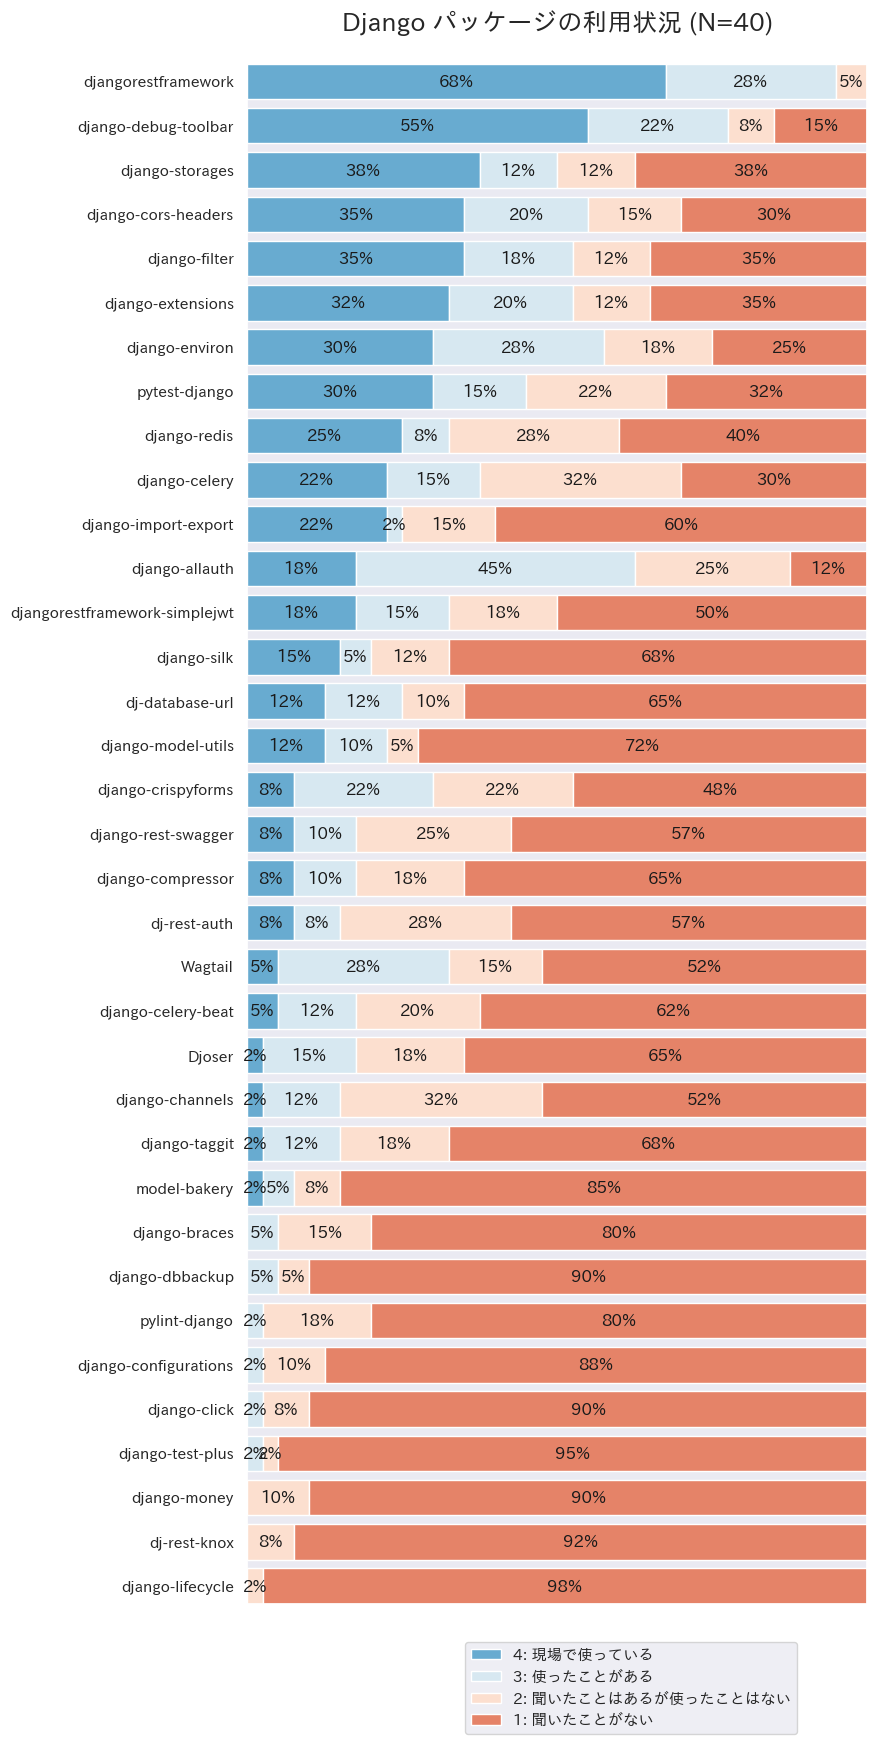

In [8]:
# 積み上げ横棒グラフを描画
# https://pystyle.info/matplotlib-stacked-bar-chart/

# 正規化する
df_count = df_count.div(df_count.sum(axis=1), axis=0)

n_rows, n_cols = df_count.shape
positions = np.arange(n_rows)
offsets = np.zeros(n_rows, dtype=df_count.values.dtype)

# グラフで使用する色
# https://qiita.com/kenmatsu4/items/fe8a2f1c34c8d5676df8
# colors = generate_cmap(['mediumblue', 'limegreen', 'orangered'])(np.linspace(0, 1, n_cols))
colors = plt.get_cmap('RdBu')(np.linspace(0.75, 0.25, n_cols))

# https://qiita.com/cnloni/items/20b5908fbae755192498
fig, ax = plt.subplots(figsize=(8.0, 20.0))
# X軸の目盛りを非表示に
ax.set_xticks([])
ax.set_yticks(positions)
ax.set_yticklabels(df_count.index)

for i in range(len(df_count.columns)):
    # 棒グラフを描画する
    bar = ax.barh(
        positions, df_count.iloc[:, i],
        left=offsets,
        label=df_count.columns[i],
        color=colors[i],
    )
    offsets += df_count.iloc[:, i]

    # 棒グラフのラベルを描画する
    for rect, value in zip(bar, df_count.iloc[:, i]):
        cx = rect.get_x() + rect.get_width() / 2
        cy = rect.get_y() + rect.get_height() / 2
        ax.text(cx, cy, f'{value:.0%}' if value > 0 else '', color='k', ha='center', va='center')

# タイトル
ax.set_title(f'Django パッケージの利用状況 (N={n})', size=18, pad=24)
# 凡例を表示
ax.legend(bbox_to_anchor=(0.9, -0.02))  # (横方向, 縦方向)
# Y軸を反転させる
# https://pystyle.info/matplotlib-invert-axis/
ax.invert_yaxis()

# 上下の余白を調整
# https://stackoverflow.com/questions/30858138/manipulating-top-and-bottom-margins-in-pyplot-horizontal-stacked-bar-chart-barh
plt.ylim(max(positions) + 0.4, min(positions) - 0.4)

## 経験3年未満の利用実態

In [9]:
# 経験3年未満
df_under_3_years = df.loc[df['Q1．Django の経験はどのくらいですか？'].isin(['経験なし', '1年未満', '1〜3年くらい']), :]
n_under_3_years = len(df_under_3_years)

# Djangoパッケージの質問のみに列を限定して、列名を置換
df_under_3_years = df_under_3_years.iloc[:, 2:].rename(columns=usage_to_package_name)

# 列ごとに出現回数をカウント
df_count_under_3_years = df_under_3_years.apply(pd.Series.value_counts)
# 転置して、indexがパッケージ名、columnsが回答（1.〜4.の選択肢）となるDataFrameに変換する
df_count_under_3_years = df_count_under_3_years.T

# NaNを0に変換
df_count_under_3_years = df_count_under_3_years.fillna(0)

# # 列を 4 → 1 の順に並べ替え
df_count_under_3_years = df_count_under_3_years.reindex(columns=reversed_choices)

# 利用度や認知度が高い順にソート
df_count_under_3_years = df_count_under_3_years.sort_values(reversed_choices, ascending=False)
df_count_under_3_years

4: 現場で使っている  3: 使ったことがある  2: 聞いたことはあるが使ったことはない  1: 聞いたことがない
djangorestframework                           10.0                  8.0                                    2.0                  0.0
django-debug-toolbar                           6.0                  6.0                                    3.0                  5.0
django-environ                                 5.0                  3.0                                    3.0                  9.0
pytest-django                                  3.0                  4.0                                    7.0                  6.0
django-storages                                3.0                  4.0                                    3.0                 10.0
django-import-export                           3.0                  0.0                                    3.0                 14.0
django-cors-headers                            2.0                  4.0                                    3.0                 11.0
djangorestframework-simplejwt                  2.0                  3.0                                    4.0                 11.0
django-filter                                  2.0                  3.0                                    3.0                 12.0
django-celery                                  2.0                  2.0                                    6.0                 10.0
django-extensions                              2.0                  1.0                                    5.0                 12.0
django-allauth                                 1.0                 12.0                                    4.0                  3.0
django-redis                                   1.0                  2.0                                    6.0                 11.0
dj-rest-auth                                   1.0                  2.0                                    5.0                 12.0
django-rest-swagger                            1.0                  2.0                                    4.0                 13.0
django-taggit                                  1.0                  2.0                                    1.0                 16.0
django-celery-beat                             1.0                  1.0                                    2.0                 16.0
model-bakery                                   1.0                  1.0                                    1.0                 17.0
dj-database-url                                1.0                  1.0                                    0.0                 18.0
django-model-utils                             1.0                  1.0                                    0.0                 18.0
django-silk                                    1.0                  0.0                                    2.0                 17.0
django-crispyforms                             0.0                  4.0                                    3.0                 13.0
Wagtail                                        0.0                  3.0                                    4.0                 13.0
Djoser                                         0.0                  2.0                                    5.0                 13.0
django-compressor                              0.0                  2.0                                    1.0                 17.0
pylint-django                                  0.0                  1.0                                    4.0                 15.0
django-channels                                0.0                  1.0                                    3.0                 16.0
django-dbbackup                                0.0                  1.0                                    1.0                 18.0
django-test-plus                               0.0                  1.0                                    1.0                 18.0
django-click                                   0.0                  1.0                                    0.0  

(34.4, -0.4)

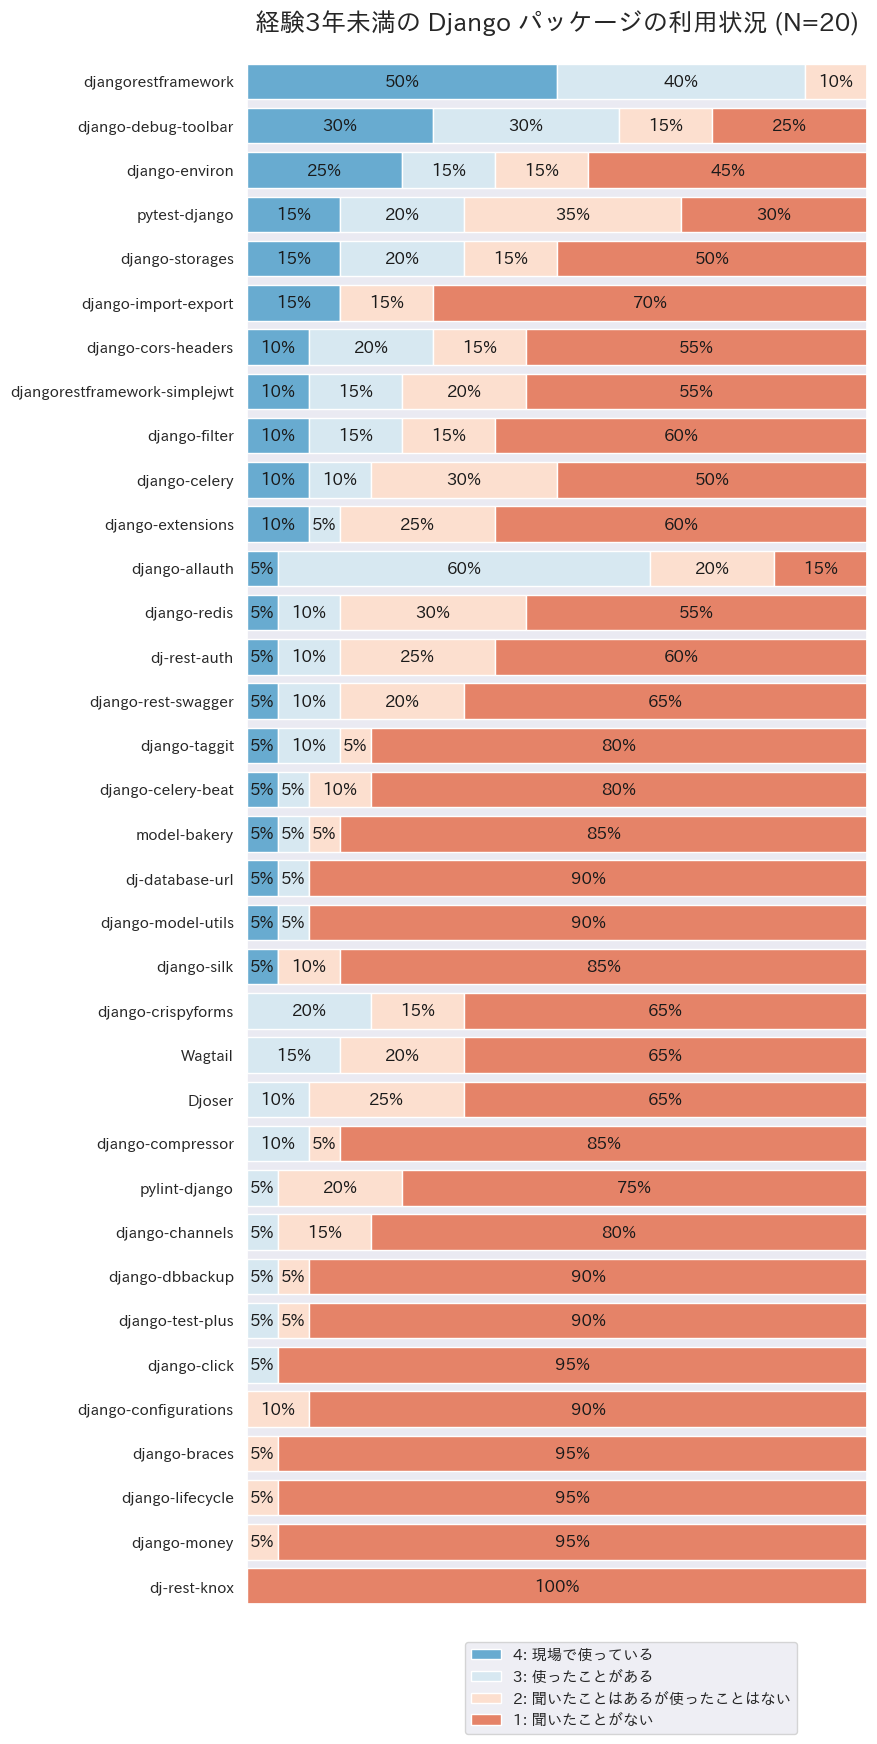

In [10]:
# 積み上げ横棒グラフを描画

# 正規化する
df_count_under_3_years = df_count_under_3_years.div(df_count_under_3_years.sum(axis=1), axis=0)

n_rows, n_cols = df_count_under_3_years.shape
positions = np.arange(n_rows)
offsets = np.zeros(n_rows, dtype=df_count_under_3_years.values.dtype)

# グラフで使用する色
# https://qiita.com/kenmatsu4/items/fe8a2f1c34c8d5676df8
# colors = generate_cmap(['mediumblue', 'limegreen', 'orangered'])(np.linspace(0, 1, n_cols))
colors = plt.get_cmap('RdBu')(np.linspace(0.75, 0.25, n_cols))

# https://qiita.com/cnloni/items/20b5908fbae755192498
fig, ax = plt.subplots(figsize=(8.0, 20.0))
# X軸の目盛りを非表示に
ax.set_xticks([])
ax.set_yticks(positions)
ax.set_yticklabels(df_count_under_3_years.index)

for i in range(len(df_count_under_3_years.columns)):
    # 棒グラフを描画する
    bar = ax.barh(
        positions, df_count_under_3_years.iloc[:, i],
        left=offsets,
        label=df_count_under_3_years.columns[i],
        color=colors[i],
    )
    offsets += df_count_under_3_years.iloc[:, i]

    # 棒グラフのラベルを描画する
    for rect, value in zip(bar, df_count_under_3_years.iloc[:, i]):
        cx = rect.get_x() + rect.get_width() / 2
        cy = rect.get_y() + rect.get_height() / 2
        ax.text(cx, cy, f'{value:.0%}' if value > 0 else '', color='k', ha='center', va='center')

# タイトル
ax.set_title(f'経験3年未満の Django パッケージの利用状況 (N={n_under_3_years})', size=18, pad=24)
# 凡例を表示
ax.legend(bbox_to_anchor=(0.9, -0.02))  # (横方向, 縦方向)
# Y軸を反転させる
# https://pystyle.info/matplotlib-invert-axis/
ax.invert_yaxis()

# 上下の余白を調整
# https://stackoverflow.com/questions/30858138/manipulating-top-and-bottom-margins-in-pyplot-horizontal-stacked-bar-chart-barh
plt.ylim(max(positions) + 0.4, min(positions) - 0.4)

## 経験年数ごとの比較

In [11]:
# 使ったことがある（'4: 現場で使っている' + '3: 使ったことがある'）を最優先にしてソート
df_count['4 + 3'] = df_count['4: 現場で使っている'] + df_count['3: 使ったことがある']
df_count_4_3 = df_count.sort_values(['4 + 3', *reversed_choices], ascending=False)
df_count_4_3

4: 現場で使っている  3: 使ったことがある  2: 聞いたことはあるが使ったことはない  1: 聞いたことがない  4 + 3
djangorestframework                          0.675                0.275                                  0.050                0.000  0.950
django-debug-toolbar                         0.550                0.225                                  0.075                0.150  0.775
django-allauth                               0.175                0.450                                  0.250                0.125  0.625
django-environ                               0.300                0.275                                  0.175                0.250  0.575
django-cors-headers                          0.350                0.200                                  0.150                0.300  0.550
django-extensions                            0.325                0.200                                  0.125                0.350  0.525
django-filter                                0.350                0.175                                  0.125                0.350  0.525
django-storages                              0.375                0.125                                  0.125                0.375  0.500
pytest-django                                0.300                0.150                                  0.225                0.325  0.450
django-celery                                0.225                0.150                                  0.325                0.300  0.375
django-redis                                 0.250                0.075                                  0.275                0.400  0.325
Wagtail                                      0.050                0.275                                  0.150                0.525  0.325
djangorestframework-simplejwt                0.175                0.150                                  0.175                0.500  0.325
django-crispyforms                           0.075                0.225                                  0.225                0.475  0.300
django-import-export                         0.225                0.025                                  0.150                0.600  0.250
dj-database-url                              0.125                0.125                                  0.100                0.650  0.250
django-model-utils                           0.125                0.100                                  0.050                0.725  0.225
django-silk                                  0.150                0.050                                  0.125                0.675  0.200
django-rest-swagger                          0.075                0.100                                  0.250                0.575  0.175
django-compressor                            0.075                0.100                                  0.175                0.650  0.175
django-celery-beat                           0.050                0.125                                  0.200                0.625  0.175
Djoser                                       0.025                0.150                                  0.175                0.650  0.175
dj-rest-auth                                 0.075                0.075                                  0.275                0.575  0.150
django-channels                              0.025                0.125                                  0.325                0.525  0.150
django-taggit                                0.025                0.125                                  0.175                0.675  0.150
model-bakery                                 0.025                0.050                                  0.075                0.850  0.075
django-braces                                0.000                0.050                                  0.150                0.800  0.050
django-dbbackup                              0.000                0.050                                  0.050                0.900  0.050
pylint-django                            

In [12]:
# 聞いたことがある（'4: 現場で使っている' + '3: 使ったことがある' + '2: 聞いたことはあるが使ったことはない'）を最優先にしてソート
df_count['4 + 3 + 2'] = df_count['4: 現場で使っている'] + df_count['3: 使ったことがある'] + df_count['2: 聞いたことはあるが使ったことはない']
df_count_4_3_2 = df_count.sort_values(['4 + 3 + 2', *reversed_choices], ascending=False)
df_count_4_3_2

4: 現場で使っている  3: 使ったことがある  2: 聞いたことはあるが使ったことはない  1: 聞いたことがない  4 + 3  \
djangorestframework                          0.675                0.275                                  0.050                0.000  0.950   
django-allauth                               0.175                0.450                                  0.250                0.125  0.625   
django-debug-toolbar                         0.550                0.225                                  0.075                0.150  0.775   
django-environ                               0.300                0.275                                  0.175                0.250  0.575   
django-cors-headers                          0.350                0.200                                  0.150                0.300  0.550   
django-celery                                0.225                0.150                                  0.325                0.300  0.375   
pytest-django                                0.300                0.150                                  0.225                0.325  0.450   
django-extensions                            0.325                0.200                                  0.125                0.350  0.525   
django-filter                                0.350                0.175                                  0.125                0.350  0.525   
django-storages                              0.375                0.125                                  0.125                0.375  0.500   
django-redis                                 0.250                0.075                                  0.275                0.400  0.325   
django-crispyforms                           0.075                0.225                                  0.225                0.475  0.300   
djangorestframework-simplejwt                0.175                0.150                                  0.175                0.500  0.325   
Wagtail                                      0.050                0.275                                  0.150                0.525  0.325   
django-channels                              0.025                0.125                                  0.325                0.525  0.150   
dj-rest-auth                                 0.075                0.075                                  0.275                0.575  0.150   
django-rest-swagger                          0.075                0.100                                  0.250                0.575  0.175   
django-import-export                         0.225                0.025                                  0.150                0.600  0.250   
django-celery-beat                           0.050                0.125                                  0.200                0.625  0.175   
dj-database-url                              0.125                0.125                                  0.100                0.650  0.250   
django-compressor                            0.075                0.100                                  0.175                0.650  0.175   
Djoser                                       0.025                0.150                                  0.175                0.650  0.175   
django-silk                                  0.150                0.050                                  0.125                0.675  0.200   
django-taggit                                0.025                0.125                                  0.175                0.675  0.150   
django-model-utils                           0.125                0.100                                  0.050                0.725  0.225   
django-braces                                0.000                0.050                                  0.150                0.800  0.050   
pylint-django                                0.000                0.025                                  0.175                0.800  0.025   
model-bakery                                 0.025                0.050                         

In [13]:
# パッケージ利用実態の回答文字列から先頭1文字の数値文字列を取り出してint型に変換する関数
def usage_to_int(x: str):
    return int(x[:1])


# Djangoパッケージの質問のみに列を限定して、列名を置換し、回答文字列をintに変換
df_int = df.iloc[:, 2:].rename(columns=usage_to_package_name).applymap(usage_to_int)
df_int

dj-database-url  dj-rest-knox  dj-rest-auth  django-allauth  django-braces  django-celery  django-celery-beat  django-channels  django-click  \
0                 3             2             3               3              2              3                   2                2             1   
1                 1             1             1               1              1              1                   1                1             1   
2                 2             2             2               3              2              4                   3                3             2   
3                 4             1             4               4              1              2                   2                2             1   
4                 1             1             3               3              1              2                   2                1             1   
5                 1             1             1               3              1              1                   1                1             1   
6                 3             1             2               2              2              2                   1                3             1   
7                 4             1             2               4              1              4                   4                3             1   
8                 1             1             2               4              1              2                   2                2             1   
9                 4             1             1               2              1              3                   3                3             1   
10                1             1             1               1              1              2                   1                2             1   
11                4             1             4               4              2              4                   2                4             2   
12                1             1             2               2              1              3                   1                1             1   
13                2             1             1               3              3              3                   3                2             1   
14                1             1             1               2              1              1                   1                1             1   
15                1             1             1               4              1              3                   1                1             1   
16                1             1             1               3              1              1                   1                1             1   
17                1             1             2               3              1              1                   1                1             1   
18                3             1             1               2              1              4                   1                2             1   
19                1             1             2               3              1              1                   1                1             1   
20                2             1             1               3              1              2                   1                2             1   
21                1             1             1               3              1              1                   1                2             1   
22                2             1             1               4              1              4                   3                2             1   
23                1             1             1               3              1              1                   1                3             1   
24                1             1             4               3              1              2                   1                1             1   
25                1             1             3               3              1              1                   1                1             1   
26      

In [14]:
# 数値に変換した利用実態の平均値が高いDjangoパッケージランキング
df_int.iloc[:, 1:].mean().sort_values(ascending=False)

djangorestframework              3.625
django-debug-toolbar             3.175
django-allauth                   2.675
django-environ                   2.625
django-cors-headers              2.600
django-filter                    2.525
django-storages                  2.500
django-extensions                2.500
pytest-django                    2.425
django-celery                    2.300
django-redis                     2.175
djangorestframework-simplejwt    2.000
django-crispyforms               1.900
django-import-export             1.875
Wagtail                          1.850
django-silk                      1.675
django-rest-swagger              1.675
django-channels                  1.650
dj-rest-auth                     1.650
django-model-utils               1.625
django-compressor                1.600
django-celery-beat               1.600
Djoser                           1.550
django-taggit                    1.500
django-braces                    1.250
model-bakery             

In [15]:
# 経験年数で「4: 現場で使っている」の平均数を比較する
df_int = pd.concat([
    # Django経験年数の質問のみに列を限定して、回答文字列をintに変換
    df.iloc[:, 1:2].applymap(experience_to_int),
    # Djangoパッケージの質問のみに列を限定して、列名を置換し、回答文字列をintに変換
    df.iloc[:, 2:].rename(columns=usage_to_package_name).applymap(usage_to_int),
], axis=1)

# 経験5年以上
df_over_5_years = df_int.loc[df_int['Q1．Django の経験はどのくらいですか？'] >= 5, :]
# Djangoパッケージの質問のみに列を限定
df_over_5_years = df_over_5_years.iloc[:, 1:]
# 行ごとの「4: 現場で使っている」の数を合計して、平均を取る
(df_over_5_years == 4).sum(axis=1).mean()

8.6

In [16]:
# 経験3〜5年
df_3_5_years = df_int.loc[df_int['Q1．Django の経験はどのくらいですか？'] == 4, :]
# Djangoパッケージの質問のみに列を限定
df_3_5_years = df_3_5_years.iloc[:, 1:]
# 行ごとの「4: 現場で使っている」の数を合計して、平均を取る
(df_3_5_years == 4).sum(axis=1).mean()

7.1

In [17]:
# 経験1〜3年
df_1_3_years = df_int.loc[df_int['Q1．Django の経験はどのくらいですか？'] == 2, :]
# Djangoパッケージの質問のみに列を限定
df_1_3_years = df_1_3_years.iloc[:, 1:]
# 行ごとの「4: 現場で使っている」の数を合計して、平均を取る
(df_1_3_years == 4).sum(axis=1).mean()

2.588235294117647

In [18]:
# 経験1年未満・経験なし
df_under_1_years = df_int.loc[df_int['Q1．Django の経験はどのくらいですか？'] < 1, :]
# Djangoパッケージの質問のみに列を限定
df_under_1_years = df_under_1_years.iloc[:, 1:]
# 行ごとの「4: 現場で使っている」の数を合計して、平均を取る
(df_under_1_years == 4).sum(axis=1).mean()

2.0

In [19]:
sr_usage_by_experience = pd.Series({
    '1年未満・経験なし': (df_under_1_years == 4).sum(axis=1).mean(),
    '1〜3年くらい': (df_1_3_years == 4).sum(axis=1).mean(),
    '3〜5年くらい': (df_3_5_years == 4).sum(axis=1).mean(),
    '5年以上': (df_over_5_years == 4).sum(axis=1).mean(),
})
sr_usage_by_experience

1年未満・経験なし    2.000000
1〜3年くらい         2.588235
3〜5年くらい         7.100000
5年以上              8.600000
dtype: float64

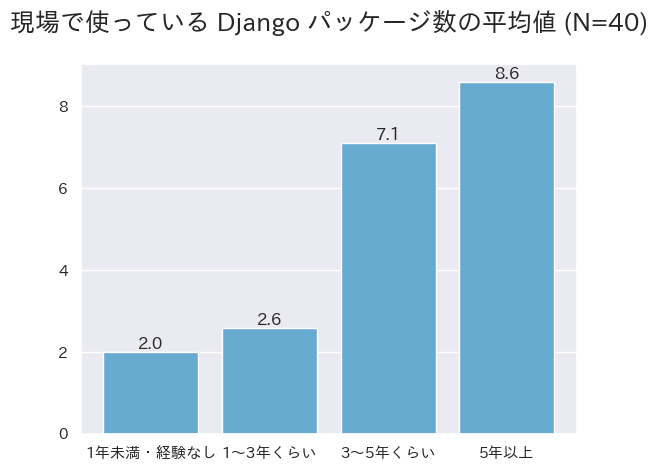

In [20]:
# 縦棒グラフを描画

n_rows, = sr_usage_by_experience.shape
positions = np.arange(n_rows)
# グラフで使用する色
color = '#68abd0',  # matplotlib.colors.rgb2hex(colors[0])

# https://qiita.com/cnloni/items/20b5908fbae755192498
fig, ax = plt.subplots()

# 棒グラフを描画する
bar = ax.bar(
    sr_usage_by_experience.index,
    sr_usage_by_experience.values,
    color=color,
)

# 棒グラフのラベルを描画する
for rect, value in zip(bar, sr_usage_by_experience.values):
    cx = rect.get_x() + rect.get_width() / 2
    cy = rect.get_height()
    ax.text(cx, cy, f'{value:,.1f}', ha='center', va='bottom')

# タイトル
ax.set_title(f'現場で使っている Django パッケージ数の平均値 (N={n})', size=18, pad=24)
# 縦方向のグリッド線を消す
ax.grid(False, axis='x')

## PyPIのダウンロード数ランキング

In [21]:
# PyPIのダウンロード数でランキング
# 2022-12-01までの過去30日間のダウンロード数を利用
# https://hugovk.github.io/top-pypi-packages/

sr_download = pd.Series({
    'dj-database-url': 762979,
    'dj-rest-knox': None,
    'dj-rest-auth': 134722,
    'django-allauth': 518891,
    'django-braces': 143895,
    'django-celery': None,
    'django-celery-beat': 671652,
    'django-channels': 494939,
    'django-click': None,
    'django-compressor': 328556,
    'django-configurations': 86490,
    'django-cors-headers': 2744382,
    'django-crispyforms': 571405,
    'django-dbbackup': None,
    'django-debug-toolbar': 1433085,
    'django-environ': 951754,
    'django-extensions': 1782704,
    'django-filter': 2386083,
    'django-import-export': 624559,
    'django-lifecycle': None,
    'django-model-utils': 799577,
    'django-money': 118644,
    'django-redis': 1272356,
    'django-rest-swagger': 297653,
    'django-storages': 1738407,
    'django-silk': 214329,
    'django-taggit': 309124,
    'django-test-plus': None,
    'djangorestframework': 4913480,
    'djangorestframework-simplejwt': 853614,
    'Djoser': 109100,
    'model-bakery': 260366,
    'pylint-django': 606893,
    'pytest-django': 1413554,
    'Wagtail': 109067,
})

sr_download = sr_download.dropna()
sr_download = sr_download.sort_values(ascending=False)
sr_download

djangorestframework              4913480.0
django-cors-headers              2744382.0
django-filter                    2386083.0
django-extensions                1782704.0
django-storages                  1738407.0
django-debug-toolbar             1433085.0
pytest-django                    1413554.0
django-redis                     1272356.0
django-environ                    951754.0
djangorestframework-simplejwt     853614.0
django-model-utils                799577.0
dj-database-url                   762979.0
django-celery-beat                671652.0
django-import-export              624559.0
pylint-django                     606893.0
django-crispyforms                571405.0
django-allauth                    518891.0
django-channels                   494939.0
django-compressor                 328556.0
django-taggit                     309124.0
django-rest-swagger               297653.0
model-bakery                      260366.0
django-silk                       214329.0
django-brac

(28.4, -0.4)

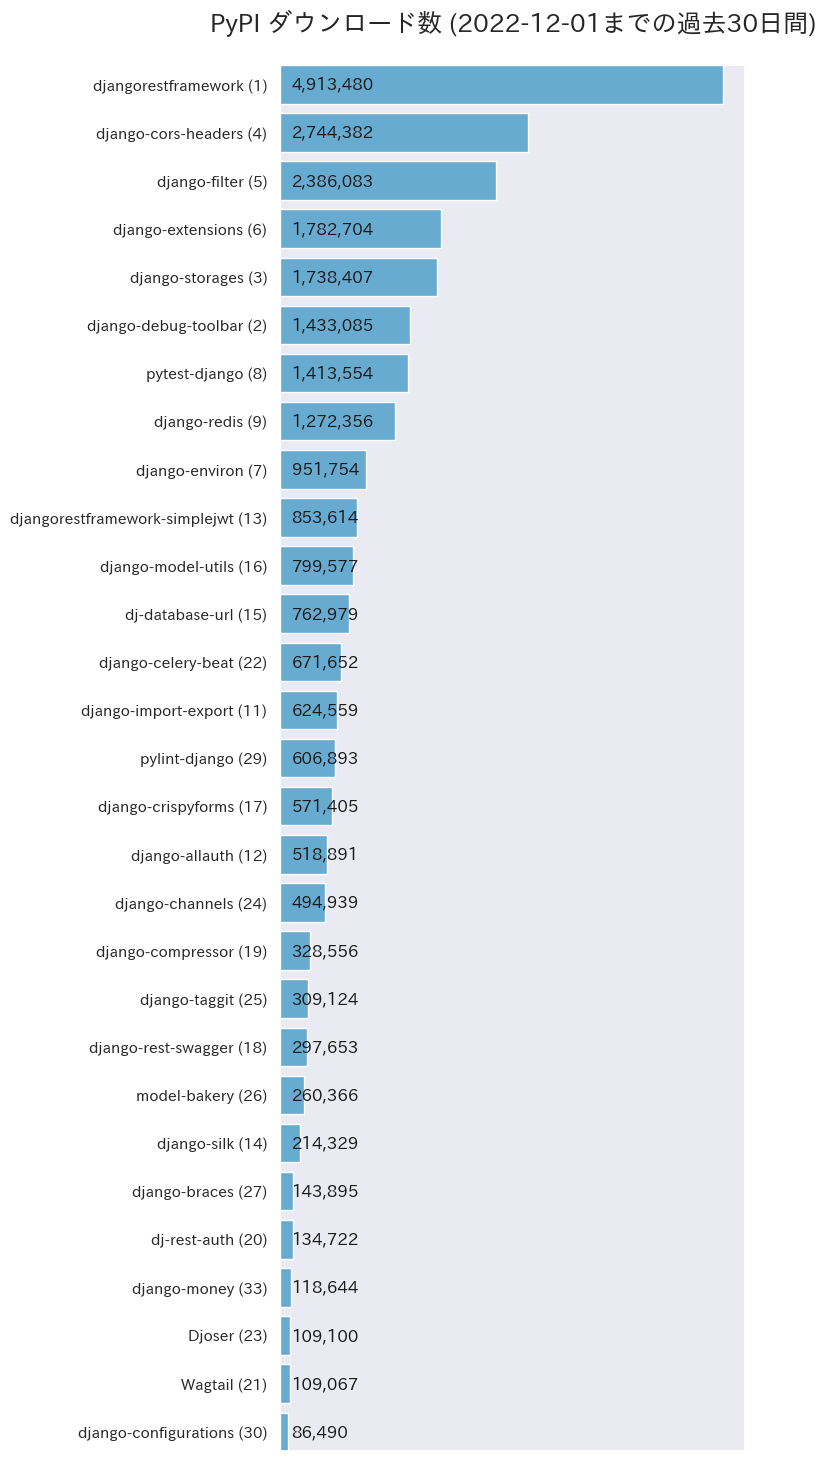

In [22]:
# 横棒グラフを描画
# https://pystyle.info/matplotlib-stacked-bar-chart/

n_rows, = sr_download.shape
positions = np.arange(n_rows)
# グラフで使用する色
color = '#68abd0',  # matplotlib.colors.rgb2hex(colors[0])

# https://qiita.com/cnloni/items/20b5908fbae755192498
fig, ax = plt.subplots(figsize=(6.0, 18.0))
# X軸の目盛りを非表示に
ax.set_xticks([])
ax.set_yticks(positions)
ax.set_yticklabels(sr_download.index)

# 現場で使っている順にソートしたパッケージのリスト
packages_4 = df_count.index.values.tolist()

# 棒グラフを描画する
bar = ax.barh(
    positions,
    sr_download.values,
    tick_label=[f'{package} ({packages_4.index(package) + 1})' for package in sr_download.index],
    color=color,
)

# 棒グラフのラベルを描画する
for rect, value in zip(bar, sr_download.values):
    cx = sr_download.values.max() / 40  # 左側を少し空ける
    cy = rect.get_y() + rect.get_height() / 2
    ax.text(cx, cy, f'{value:,.0f}', color='k', ha='left', va='center')

# タイトル
ax.set_title('PyPI ダウンロード数 (2022-12-01までの過去30日間)', size=18, pad=24)
# グリッド線を消す
ax.grid(False)

# 上下の余白を調整
# https://stackoverflow.com/questions/30858138/manipulating-top-and-bottom-margins-in-pyplot-horizontal-stacked-bar-chart-barh
plt.ylim(max(positions) + 0.4, min(positions) - 0.4)

## GitHubスター数ランキング

In [23]:
# GitHubスター数でランキング（2022-12-14時点）

sr_github_stars = pd.Series({
    'dj-database-url': 1306,
    'dj-rest-knox': 861,
    'dj-rest-auth': 1124,
    'django-allauth': 7629,
    'django-braces': 1859,
    'django-celery': 1474,
    'django-celery-beat': 1269,
    'django-channels': 5463,
    'django-click': 214,
    'django-compressor': 2620,
    'django-configurations': 950,
    'django-cors-headers': 4814,
    'django-crispyforms': 4579,
    'django-dbbackup': 682,
    'django-debug-toolbar': 7288,
    'django-environ': 2670,
    'django-extensions': 5950,
    'django-filter': 3883,
    'django-import-export': 2574,
    'django-lifecycle': 1020,
    'django-model-utils': 2370,
    'django-money': 1353,
    'django-redis': 2475,
    'django-rest-swagger': 2587,
    'django-storages': 2299,
    'django-silk': 3642,
    'django-taggit': 2959,
    'django-test-plus': 545,
    'djangorestframework': 24624,
    'djangorestframework-simplejwt': 3229,
    'Djoser': 2188,
    'model-bakery': 624,
    'pylint-django': 542,
    'pytest-django': 1123,
    'Wagtail': 13668,
})

sr_github_stars = sr_github_stars.sort_values(ascending=False)
sr_github_stars

djangorestframework              24624
Wagtail                          13668
django-allauth                    7629
django-debug-toolbar              7288
django-extensions                 5950
django-channels                   5463
django-cors-headers               4814
django-crispyforms                4579
django-filter                     3883
django-silk                       3642
djangorestframework-simplejwt     3229
django-taggit                     2959
django-environ                    2670
django-compressor                 2620
django-rest-swagger               2587
django-import-export              2574
django-redis                      2475
django-model-utils                2370
django-storages                   2299
Djoser                            2188
django-braces                     1859
django-celery                     1474
django-money                      1353
dj-database-url                   1306
django-celery-beat                1269
dj-rest-auth             

(34.4, -0.4)

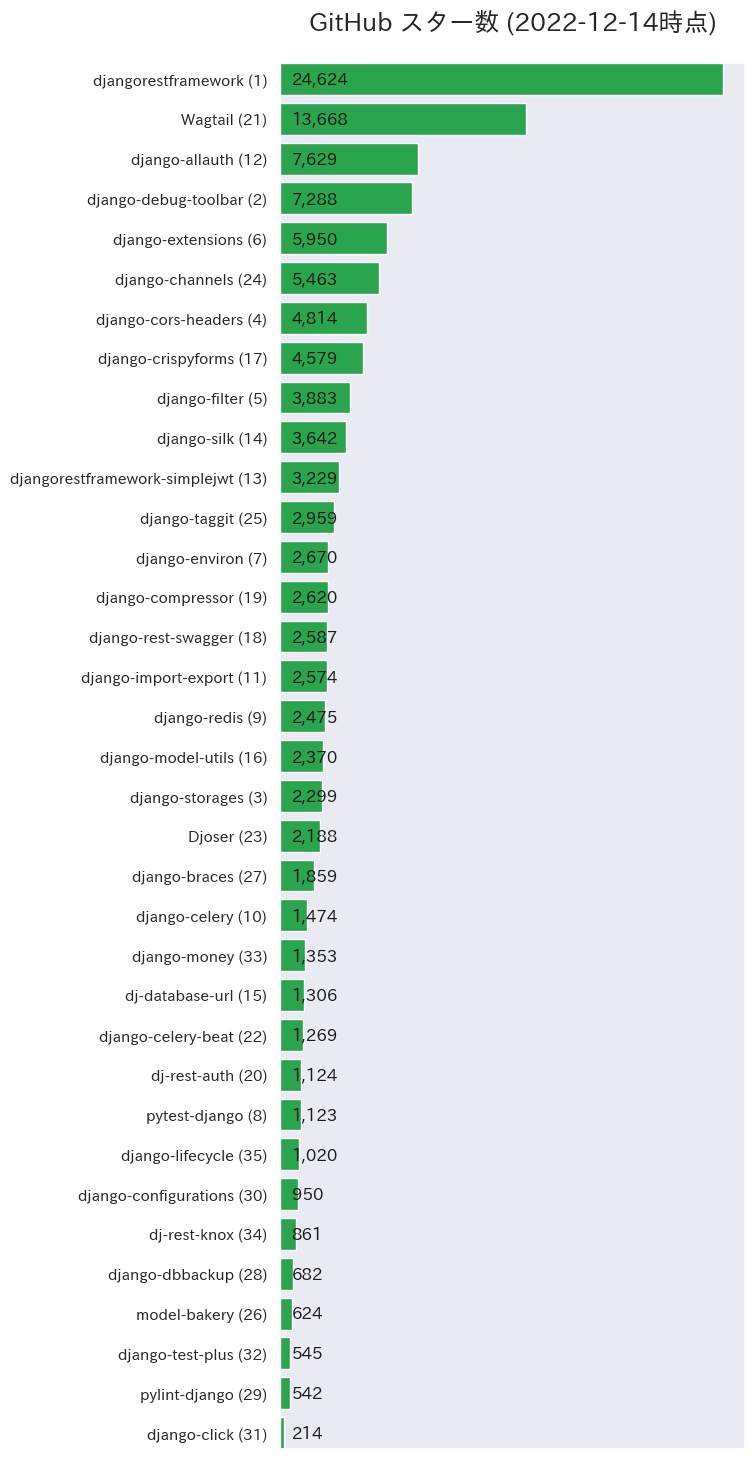

In [24]:
# 横棒グラフを描画
# https://pystyle.info/matplotlib-stacked-bar-chart/

n_rows, = sr_github_stars.shape
positions = np.arange(n_rows)
# グラフで使用する色
color = '#2ba44e'

fig, ax = plt.subplots(figsize=(6.0, 18.0))
# X軸の目盛りを非表示に
ax.set_xticks([])
ax.set_yticks(positions)
ax.set_yticklabels(sr_github_stars.index)

# 棒グラフを描画する
bar = ax.barh(
    positions, sr_github_stars.values,
    color=color,
    tick_label=[f'{package} ({packages_4.index(package) + 1})' for package in sr_github_stars.index],
)

# 棒グラフのラベルを描画する
for rect, value in zip(bar, sr_github_stars.values):
    cx = sr_github_stars.values.max() / 40  # 左側を少し空ける
    cy = rect.get_y() + rect.get_height() / 2
    ax.text(cx, cy, f'{value:,.0f}', color='k', ha='left', va='center')

# タイトル
ax.set_title(f'GitHub スター数 (2022-12-14時点)', size=18, pad=24)
# グリッド線を消す
ax.grid(False)

# 上下の余白を調整
# https://stackoverflow.com/questions/30858138/manipulating-top-and-bottom-margins-in-pyplot-horizontal-stacked-bar-chart-barh
plt.ylim(max(positions) + 0.4, min(positions) - 0.4)

## 経験年数との相関

In [25]:
df_int = pd.concat([
    # Django経験年数の質問のみに列を限定して、回答文字列をintに変換
    df.iloc[:, 1:2].applymap(experience_to_int),
    # Djangoパッケージの質問のみに列を限定して、列名を置換し、回答文字列をintに変換
    df.iloc[:, 2:].rename(columns=usage_to_package_name).applymap(usage_to_int),
], axis=1)

df_int

Q1．Django の経験はどのくらいですか？  dj-database-url  dj-rest-knox  dj-rest-auth  django-allauth  django-braces  django-celery  \
0                                     7.5                3             2             3               3              2              3   
1                                     4.0                1             1             1               1              1              1   
2                                     7.5                2             2             2               3              2              4   
3                                     7.5                4             1             4               4              1              2   
4                                     2.0                1             1             3               3              1              2   
5                                     2.0                1             1             1               3              1              1   
6                                     7.5                3             1             2               2              2              2   
7                                     4.0                4             1             2               4              1              4   
8                                     7.5                1             1             2               4              1              2   
9                                     4.0                4             1             1               2              1              3   
10                                    2.0                1             1             1               1              1              2   
11                                    7.5                4             1             4               4              2              4   
12                                    4.0                1             1             2               2              1              3   
13                                    7.5                2             1             1               3              3              3   
14                                    0.0                1             1             1               2              1              1   
15                                    0.5                1             1             1               4              1              3   
16                                    2.0                1             1             1               3              1              1   
17                                    2.0                1             1             2               3              1              1   
18                                    7.5                3             1             1               2              1              4   
19                                    2.0                1             1             2               3              1              1   
20                                    4.0                2             1             1               3              1              2   
21                                    7.5                1             1             1               3              1              1   
22                                    4.0                2             1             1               4              1              4   
23                                    2.0                1             1             1               3              1              1   
24                                    2.0                1             1             4               3              1              2   
25                                    2.0                1             1             3               3              1              1   
26                                    2.0                1             1             1               2              1              2   
27                                    2.0                3             1             1               3              1              1   
28                                    4.0                1             1  

In [26]:
df_int.describe()

Q1．Django の経験はどのくらいですか？  dj-database-url  dj-rest-knox  dj-rest-auth  django-allauth  django-braces  django-celery  \
count                              40.000000        40.000000     40.000000     40.000000       40.000000      40.000000      40.000000   
mean                                3.750000         1.725000      1.075000      1.650000        2.675000       1.250000       2.300000   
std                                 2.420532         1.109111      0.266747      0.921259        0.916725       0.543021       1.136797   
min                                 0.000000         1.000000      1.000000      1.000000        1.000000       1.000000       1.000000   
25%                                 2.000000         1.000000      1.000000      1.000000        2.000000       1.000000       1.000000   
50%                                 3.000000         1.000000      1.000000      1.000000        3.000000       1.000000       2.000000   
75%                                 4.875000         2.250000      1.000000      2.000000        3.000000       1.000000       3.000000   
max                                 7.500000         4.000000      2.000000      4.000000        4.000000       3.000000       4.000000   

       django-celery-beat  django-channels  django-click  django-compressor  django-configurations  django-cors-headers  django-crispyforms  \
count           40.000000         40.00000     40.000000          40.000000              40.000000            40.000000           40.000000   
mean             1.600000          1.65000      1.125000           1.600000               1.150000             2.600000            1.900000   
std              0.900142          0.80224      0.404304           0.955416               0.426675             1.256777            1.007663   
min              1.000000          1.00000      1.000000           1.000000               1.000000             1.000000            1.000000   
25%              1.000000          1.00000      1.000000           1.000000               1.000000             1.000000            1.000000   
50%              1.000000          1.00000      1.000000           1.000000               1.000000             3.000000            2.000000   
75%              2.000000          2.00000      1.000000           2.000000               1.000000             4.000000            3.000000   
max              4.000000          4.00000      3.000000           4.000000               3.000000             4.000000            4.000000   

       django-dbbackup  django-debug-toolbar  django-environ  django-extensions  django-filter  django-import-export  django-lifecycle  \
count        40.000000             40.000000       40.000000          40.000000      40.000000             40.000000         40.000000   
mean          1.150000              3.175000        2.625000           2.500000       2.525000              1.875000          1.025000   
std           0.483046              1.106797        1.169867           1.281025       1.300641              1.244217          0.158114   
min           1.000000              1.000000        1.000000           1.000000       1.000000              1.000000          1.000000   
25%           1.000000              3.000000        1.750000           1.000000       1.000000              1.000000          1.000000   
50%           1.000000              4.000000        3.000000           3.000000       3.000000              1.000000          1.000000   
75%           1.000000              4.000000        4.000000           4.000000       4.000000              2.250000          1.000000   
max           3.000000              4.000000        4.000000           4.000000       4.000000              4.000000          2.000000   

       django-model-utils  django-money  django-redis  django-rest-swagger  django-storages  django-silk  django-taggit  django-test-plus  \
count           40.000000     40.000000     40.000000            40.000000        40.000000    40

In [27]:
df_corr = df_int.corr()

# https://qiita.com/ynakayama/items/7dc01f45caf6d87a981b
# fig, ax = plt.subplots(figsize=(12.0, 12.0))
# heatmap = ax.pcolor(df_corr, cmap=plt.cm.Blues)
# ax.set_xticks(np.arange(df_corr.shape[0]) + 0.5, minor=False)
# ax.set_yticks(np.arange(df_corr.shape[1]) + 0.5, minor=False)
# ax.invert_yaxis()
# ax.xaxis.tick_top()
# ax.set_xticklabels(df_corr.index, minor=False)
# ax.set_yticklabels(df_corr.columns, minor=False)

px.imshow(
    df_corr.values,
    x=df_corr.columns,
    y=df_corr.index,
    text_auto=True,
    width=1000,
    height=1000
)

In [28]:
# 経験年数との相関が高いDjangoパッケージランキング
df_corr.iloc[:, 0].sort_values(ascending=False)

Q1．Django の経験はどのくらいですか？    1.000000
django-cors-headers                      0.644804
django-silk                              0.599127
django-extensions                        0.574714
django-channels                          0.554587
django-filter                            0.535504
django-redis                             0.454751
dj-rest-knox                             0.446764
dj-database-url                          0.441734
Wagtail                                  0.433763
django-braces                            0.419417
django-celery                            0.414669
django-debug-toolbar                     0.413945
djangorestframework                      0.402476
django-environ                           0.378046
django-model-utils                       0.367632
django-storages                          0.320231
django-taggit                            0.311373
django-compressor                        0.304905
django-crispyforms                       0.299609
django-configu